# Geospatial Data Analysis I 

## Linear Regression - Solution

### Multiple linear regression with scikit-learn

In this exercise we are going to use one of the demo datasets from scikit-learn (https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). The "diabetes dataset" contains data from 442 people (age, sex, etc.). We will try to predict the blood sugar content (parameter "s6") depending on other parameters (= independent variables). 

- First, import the function `load_diabetes()` from the scikit-learn example datasets (`sklearn.datasets`), and load the dataset into your workspace (`data = load_diabetes()`). 

- Then, transform the actual data (`diabetes_dataset.data`) into a Pandas DataFrame, assigning the "feature_names" as column names (`columns = data.feature_names`).

- Last, create another variable named "target" using the function `dataset.target`. This will be dependent variable of the regression analysis. 

In [1]:
# [1]
import pandas as pd
from sklearn.datasets import load_diabetes

# loading the dataset and transforming it 
dataset = load_diabetes()
diabetes = pd.DataFrame(dataset.data, columns=dataset.feature_names)

target = dataset.target

Before doing statistical analyses, it's always good too take a look at the actual data (explorative data analysis) and inspect the relation between the individual parameters. 

- Create a correlation matrix for all variables in the data set (e.g. using `DataFrame.corr`) and visualise it as a heatmap (e.g. `using seaborn.heatmap()`, see exercise bivariate statistics). 

- Tipp: You can specify the figure size in seaborn by changing the general seaborn setting (`sns.set(rc={'figure.figsize':(10,8)})`). 

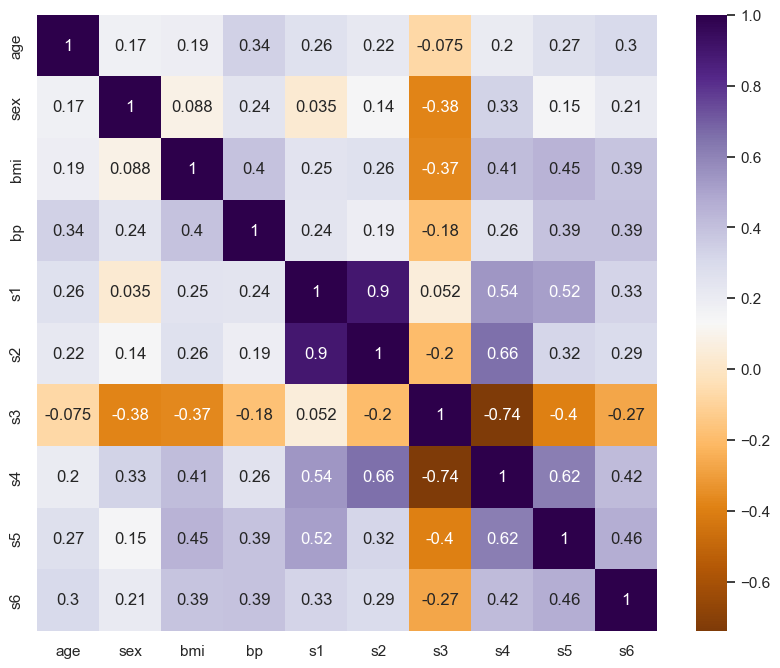

In [2]:
# [2]
# packages laden
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix berechnen
correlation_matrix = diabetes.corr()

# Korrelationsmatrix darstellen
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=correlation_matrix, annot=True, cmap='PuOr')

plt.show()

For the multiple regression analysis, pick two suitable independent variables from the correlation matrix:

- these should correlate strongly with the dependent variable (here blood sugar level "s6")

- and correlate less strongly with each other. 

Save the values of the two chosen variables into another DataFrame. 

In [3]:
# [3]
import numpy as np

# saving the selected two independent variables in one DataFrame
X = pd.DataFrame(np.c_[diabetes['bmi'], diabetes['s5']], columns = ['bmi','s5'])

Y = target

Next, we are going to split the dataset into a training and test dataset for later validation. 

- To do so, use the function `sklearn.model_selection.train_test_split()` with the independent variables (X) and dependent (Y) as inputs. Also, add the argument `test_size=0.2` to specficy that 20% of the dataset shall be used for test (and 80% for training). Accordingly the function generates four outputs (e.g. X_train, X_test, Y_train, Y_test).

In [4]:
# [4]
from sklearn.model_selection import train_test_split

# splitting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5) 

# setting the random state makes sure that the data is split exactly the same was in each run (for reproducability of the result)

Now, we can perform the linear regression analysis on the created training data set using e.g. `sklearn.linear_model.LinearRegression()`. 

- As in the last exercises, we first need to create a method object (here linear regression object) using the default settings of `sklearn.linear_model.LinearRegression()` (i.e. empty bracket).

- Then, we can fit the created object to the training data (`object.fit(X_train, Y_train)`).

In [5]:
# [5] 
from sklearn.linear_model import LinearRegression

# creating a linear regression object
lin_model = LinearRegression()

# fitting the object to data
lin_model.fit(X_train, Y_train)

LinearRegression()

Next, we evaluate the fitted linear regression model using the test dataset and error metrics. 

- Import the functions `mean_squared_error` and `r2_score` (coefficient of determination) from `sklearn.metrics`. 

- Evaluate the linear regression object by appending `.predict()`, to obtain the predicted Y values (independent variable). First, do so using the X values from the training data set, and then (separately) using the X values from the test dataset. 

- To evaluate the goodness of fit of your regression model, calculate the RMSE and coefficient of determination for the oringial Y values (Y_train) and predicted data based on the training data (Y_train_predicted). How would you judge the goodness of fit? 

- In order to the robustness of the linear regression model, also calculate the RMSE and coefficient of determination based on the test data (i.e. using Y_test and Y_test_predicted). How do they look compared to the error metrics from the training data? 

In [6]:
# [6]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# regression model predictions on the training data
y_train_predict = lin_model.predict(X_train)

# error metrics for predictions using the training data
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Modell Evaluation Trainingsdaten:")
print (rmse, r2)

# regression model predictions on the test data
y_test_predict = lin_model.predict(X_test)

# error metrics for predictions using the test data
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("\n Modell Evaluation Testdaten:")
print (rmse, r2)

Modell Evaluation Trainingsdaten:
56.560890965481114 0.4507519215172524

 Modell Evaluation Testdaten:
57.17597409506052 0.4815610845742895


As a last step, we can now also plot the data and the resulting linear regression, to check for plausibility, outliers, etc. First, pick one of the two independent variables to visualize here (you can also make two figures, one for each X)

- Make a scatter plot for the selected Y (blood sugar level) and X (either triglycerides level "s5", or body mass index "bmi") values from the entire dataset (including training and test data). 

- In order to plot the regression line, you first need to get the intercept and coefficients of the fitted linear regression. You can do so by adding the attributes `.intercept_`and `coef_` to the linear regression object. 

- Then, calculate the "y" values for the regression line by "y = intercept + coefficients * x". You can generate the corresponding x values by `numpy.linspace(min, max, num=n)`. As we did a multiple linear regression analysis, we have two coefficients (one foe s4 and one for s5). Make sure you pick the one for s5 for visualisation alongside the data for s5. 


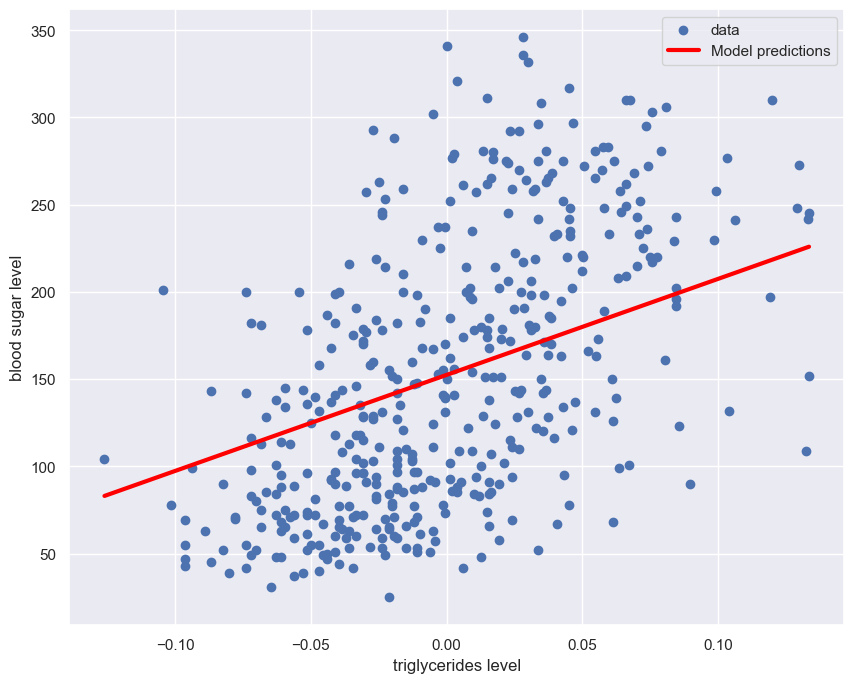

In [7]:
# [7]

fig, ax = plt.subplots(1)

# scatter plot of one X (s5) and Y (s6)
ax.scatter(X.s5, Y, label = "data")

# plotting the regression line 

inter = lin_model.intercept_ # intercept for the regression line 
coef = lin_model.coef_ # contains two coeffcients, one for regression line s4 and one for s5

x_reg = np.linspace (min(X.s5), max(X.s5), num = 100)
y_reg = inter + x_reg * coef[1] # pick second coefficient for s5 
ax.plot(x_reg, y_reg, linewidth = 3, color = "red", label="Model predictions")

ax.legend()
ax.set_xlabel("triglycerides level")
ax.set_ylabel("blood sugar level")

plt.show()


## END

### References 

https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155